# Testing Basic ML Models
**Authors:** Martin Ziran Xu

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Cleaning Data

In [3]:
#Read Data
# Can't read 1st data set
df_countries = pd.read_csv('combined_all_countries_2.csv')
df_countries.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,...,pt_100,ca_100,co_100,nz_100,tr_100,cz_100,hn_100,be_100,id_100,bo_100
0,0,0.58100,https://api.spotify.com/v1/audio-analysis/7qiZ...,0.825,233713,0.652,True,0.00000,1,0.0931,...,True,True,True,True,True,True,True,True,True,True
1,1,0.00902,https://api.spotify.com/v1/audio-analysis/12VW...,0.785,173987,0.617,True,0.00246,1,0.3510,...,True,True,True,True,True,True,True,True,False,True
2,2,0.41500,https://api.spotify.com/v1/audio-analysis/7crM...,0.736,245507,0.541,True,0.00000,8,0.1100,...,True,True,True,True,True,True,True,True,True,True
3,3,0.00346,https://api.spotify.com/v1/audio-analysis/4vS8...,0.723,176561,0.809,True,0.00123,7,0.5650,...,True,False,True,True,True,True,False,True,False,False
4,4,0.47400,https://api.spotify.com/v1/audio-analysis/34gC...,0.781,281560,0.445,True,0.00000,2,0.1840,...,True,True,True,True,False,True,True,True,True,True


In [4]:
features = list(df_countries.columns)
print(features)

['Unnamed: 0', 'acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri', 'valence', 'popularity', 'song', 'artist', 'genre', 'sv', 'cr', 'de', 'co', 'dk', 'at', 'pa', 'es', 'gb', 'sk', 'global', 'nl', 'br', 'cl', 'ec', 'lt', 'us', 'it', 'be', 'lu', 'gr', 'mx', 'uy', 'ca', 'jp', 'sg', 'tr', 'cz', 'lv', 'pe', 'ch', 'se', 'ar', 'gt', 'py', 'pl', 'ph', 'nz', 'fr', 'fi', 'hn', 'ie', 'do', 'no', 'hu', 'pt', 'is', 'bo', 'au', 'hk', 'tw', 'my', 'ee', 'py_top', 'lt_top', 'au_top', 'se_top', 'ph_top', 'ee_top', 'gt_top', 'my_top', 'gb_top', 'cr_top', 'ec_top', 'ar_top', 'is_top', 'global_top', 'uy_top', 'nl_top', 'us_top', 'sk_top', 'do_top', 'de_top', 'hu_top', 'gr_top', 'pl_top', 'cl_top', 'at_top', 'tw_top', 'fr_top', 'pe_top', 'mx_top', 'no_top', 'sg_top', 'it_top', 'sv_top', 'lv_top', 'hk_top', 'es_top', 'pa_top', 'lu_top', 'br_top', 'ch_top'

In [5]:
# Dataset with one country (global) and overall popularity
df = df_countries.loc[:, ['song', 'analysis_url','track_href','uri','artist','acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence','genre','global', 'global_100', 'global_top', 'popularity']]
df.head()

,song,analysis_url,track_href,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,...,loudness,mode,speechiness,tempo,valence,genre,global,global_100,global_top,popularity
0,Shape of You,https://api.spotify.com/v1/audio-analysis/7qiZ...,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,0.58100,0.825,233713,0.652,0.00000,...,-3.183,0,0.0802,95.977,0.931,pop,True,True,True,92
1,One Dance,https://api.spotify.com/v1/audio-analysis/12VW...,https://api.spotify.com/v1/tracks/12VWzyPDBCc8...,spotify:track:12VWzyPDBCc8fqeWCAfNwR,Drake,0.00902,0.785,173987,0.617,0.00246,...,-5.871,1,0.0522,103.981,0.382,hip hop,True,True,False,74
2,Closer,https://api.spotify.com/v1/audio-analysis/7crM...,https://api.spotify.com/v1/tracks/7crMiinWx373...,spotify:track:7crMiinWx373rNBZBaVske,The Chainsmokers,0.41500,0.736,245507,0.541,0.00000,...,-5.597,1,0.0297,94.962,0.662,house,True,True,False,65
3,Lean On (feat. MØ & DJ Snake),https://api.spotify.com/v1/audio-analysis/4vS8...,https://api.spotify.com/v1/tracks/4vS8VaBwJJV5...,spotify:track:4vS8VaBwJJV5Ry7UFIQuoo,Major Lazer,0.00346,0.723,176561,0.809,0.00123,...,-3.081,0,0.0625,98.007,0.274,electronic,True,True,False,20
4,Thinking Out Loud,https://api.spotify.com/v1/audio-analysis/34gC...,https://api.spotify.com/v1/tracks/34gCuhDGsG4b...,spotify:track:34gCuhDGsG4bRPIf9bb02f,Ed Sheeran,0.47400,0.781,281560,0.445,0.00000,...,-6.061,1,0.0295,78.998,0.591,pop,True,True,False,87


In [6]:
# clean genre: International
list_genre = pd.unique(df['genre'])
print(list_genre)
df['genre'] = df['genre']\
.replace(['French', 'German', 'Korean'], 'International')
print(pd.unique(df['genre']))

['pop' 'hip hop' 'house' 'electronic' 'latino' 'rap' 'punk' 'Unknown'
 'folk' 'r&b' 'indie' 'rock' 'French' 'German' 'metal' 'Korean']
['pop' 'hip hop' 'house' 'electronic' 'latino' 'rap' 'punk' 'Unknown'
 'folk' 'r&b' 'indie' 'rock' 'International' 'metal']


In [7]:
# clean genre: NaN
df_unknown = df[df['genre']=='Unknown']
print(df_unknown.size)
print(df.size)

220
12078


In [8]:
# Genre Dummy mapping
binary_encoded = pd.get_dummies(df['genre'])
newcols = binary_encoded.columns
df[newcols] = binary_encoded


In [9]:
df = df.drop(['genre'], axis=1)

In [10]:
# Rearrange dataset
df.head()
print(df.columns)
new_col = ['song', 'analysis_url', 'track_href', 'uri', 'artist', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'International',
       'Unknown', 'electronic', 'folk', 'hip hop', 'house', 'indie', 'latino',
       'metal', 'pop', 'punk', 'r&b', 'rap', 'rock',
       'global', 'global_100', 'global_top', 'popularity']
df = df[new_col]
df.head()

Index(['song', 'analysis_url', 'track_href', 'uri', 'artist', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'global', 'global_100', 'global_top', 'popularity', 'International',
       'Unknown', 'electronic', 'folk', 'hip hop', 'house', 'indie', 'latino',
       'metal', 'pop', 'punk', 'r&b', 'rap', 'rock'],
      dtype='object')


,song,analysis_url,track_href,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,...,metal,pop,punk,r&b,rap,rock,global,global_100,global_top,popularity
0,Shape of You,https://api.spotify.com/v1/audio-analysis/7qiZ...,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,0.58100,0.825,233713,0.652,0.00000,...,0,1,0,0,0,0,True,True,True,92
1,One Dance,https://api.spotify.com/v1/audio-analysis/12VW...,https://api.spotify.com/v1/tracks/12VWzyPDBCc8...,spotify:track:12VWzyPDBCc8fqeWCAfNwR,Drake,0.00902,0.785,173987,0.617,0.00246,...,0,0,0,0,0,0,True,True,False,74
2,Closer,https://api.spotify.com/v1/audio-analysis/7crM...,https://api.spotify.com/v1/tracks/7crMiinWx373...,spotify:track:7crMiinWx373rNBZBaVske,The Chainsmokers,0.41500,0.736,245507,0.541,0.00000,...,0,0,0,0,0,0,True,True,False,65
3,Lean On (feat. MØ & DJ Snake),https://api.spotify.com/v1/audio-analysis/4vS8...,https://api.spotify.com/v1/tracks/4vS8VaBwJJV5...,spotify:track:4vS8VaBwJJV5Ry7UFIQuoo,Major Lazer,0.00346,0.723,176561,0.809,0.00123,...,0,0,0,0,0,0,True,True,False,20
4,Thinking Out Loud,https://api.spotify.com/v1/audio-analysis/34gC...,https://api.spotify.com/v1/tracks/34gCuhDGsG4b...,spotify:track:34gCuhDGsG4bRPIf9bb02f,Ed Sheeran,0.47400,0.781,281560,0.445,0.00000,...,0,1,0,0,0,0,True,True,False,87


In [11]:
# Clean Ranking
# not needed, since True==1 in Python

In [12]:
# Shuffle dataframe
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,song,analysis_url,track_href,uri,artist,acousticness,danceability,duration_ms,energy,instrumentalness,...,metal,pop,punk,r&b,rap,rock,global,global_100,global_top,popularity
141,Good For You,https://api.spotify.com/v1/audio-analysis/5Xfy...,https://api.spotify.com/v1/tracks/5XfywqPX6XBO...,spotify:track:5XfywqPX6XBOdYQNbOaQvy,Selena Gomez,0.17400,0.600,221560,0.670,0.000000,...,0,1,0,0,0,0,False,False,False,62
150,Hymn For The Weekend - Seeb Remix,https://api.spotify.com/v1/audio-analysis/6s3G...,https://api.spotify.com/v1/tracks/6s3GEN8wK0OM...,spotify:track:6s3GEN8wK0OMzzzZbXj0fu,Coldplay,0.00868,0.565,212647,0.849,0.000005,...,0,0,0,0,0,1,True,False,False,80
76,Attention,https://api.spotify.com/v1/audio-analysis/4iLq...,https://api.spotify.com/v1/tracks/4iLqG9SeJSnt...,spotify:track:4iLqG9SeJSnt0cSPICSjxv,Charlie Puth,0.09690,0.774,211475,0.626,0.000031,...,0,1,0,0,0,0,True,True,False,90
202,Same Old Love,https://api.spotify.com/v1/audio-analysis/1BZG...,https://api.spotify.com/v1/tracks/1BZG99C7Co1r...,spotify:track:1BZG99C7Co1r6QUC3zaS59,Selena Gomez,0.02360,0.671,229080,0.596,0.000000,...,0,1,0,0,0,0,False,False,False,70
324,Animals - Extended,https://api.spotify.com/v1/audio-analysis/6JEn...,https://api.spotify.com/v1/tracks/6JEntXLt4z98...,spotify:track:6JEntXLt4z98CcDtIH9sU7,Martin Garrix,0.00181,0.675,303827,0.866,0.746000,...,0,0,0,0,0,0,False,False,False,61


## Define Input and Output

In [13]:
print(df.columns)

Index(['song', 'analysis_url', 'track_href', 'uri', 'artist', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'International', 'Unknown', 'electronic', 'folk', 'hip hop', 'house',
       'indie', 'latino', 'metal', 'pop', 'punk', 'r&b', 'rap', 'rock',
       'global', 'global_100', 'global_top', 'popularity'],
      dtype='object')


In [14]:
# Define Input
X = df.loc[:,['acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'International', 'Unknown', 'electronic', 'folk', 'hip hop', 'house',
       'indie', 'latino', 'metal', 'pop', 'punk', 'r&b', 'rap', 'rock']]
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,hip hop,house,indie,latino,metal,pop,punk,r&b,rap,rock
141,0.17400,0.600,221560,0.670,0.000000,5,0.0746,-6.455,0,0.0538,...,0,0,0,0,0,1,0,0,0,0
150,0.00868,0.565,212647,0.849,0.000005,0,0.1200,-3.516,0,0.0517,...,0,0,0,0,0,0,0,0,0,1
76,0.09690,0.774,211475,0.626,0.000031,3,0.0848,-4.432,0,0.0432,...,0,0,0,0,0,1,0,0,0,0
202,0.02360,0.671,229080,0.596,0.000000,11,0.2280,-4.005,0,0.0310,...,0,0,0,0,0,1,0,0,0,0
324,0.00181,0.675,303827,0.866,0.746000,1,0.4150,-6.454,1,0.0390,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Define Output
Y = df.loc[:, ['global', 'global_100', 'global_top', 'popularity']]
Y.head()

,global,global_100,global_top,popularity
141,False,False,False,62
150,True,False,False,80
76,True,True,False,90
202,False,False,False,70
324,False,False,False,61


## Analyze dataset

In [17]:
# Check distribution of data:
for i in range(0,3):
    #Value Counts
    print(Y.columns[i])
    print(Y.iloc[:,i].value_counts())

global
True     290
False    259
Name: global, dtype: int64
global_100
False    365
True     184
Name: global_100, dtype: int64
global_top
False    540
True       9
Name: global_top, dtype: int64


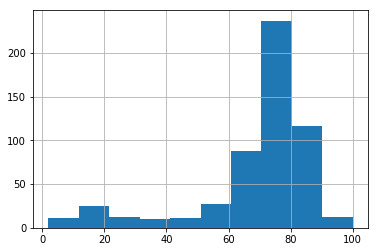

In [26]:
# Distribution of popularity
plt.figure()
Y.loc[:, 'popularity'].hist()
plt.show()

In [31]:
# Feature Correlation
X.loc[:,['acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']].corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
acousticness,1.000000,-0.088276,0.048624,-0.521427,-0.022171,-0.015877,-0.099760,-0.383796,0.118052,-0.010687,-0.080522,-0.126133
danceability,-0.088276,1.000000,-0.162434,-0.022077,0.026232,-0.048054,-0.032277,0.055084,-0.005329,0.081575,-0.179373,0.371610
duration_ms,0.048624,-0.162434,1.000000,-0.114615,0.050873,-0.025349,-0.002496,-0.159918,0.071217,-0.029222,0.014247,-0.140047
energy,-0.521427,-0.022077,-0.114615,1.000000,0.005479,0.026312,0.196110,0.708295,-0.147408,-0.044938,0.067877,0.356802
instrumentalness,-0.022171,0.026232,0.050873,0.005479,1.000000,-0.060426,0.046934,-0.107956,-0.038755,-0.073268,0.001059,-0.157590
key,-0.015877,-0.048054,-0.025349,0.026312,-0.060426,1.000000,-0.004477,-0.013531,-0.128588,0.022050,0.047458,0.005249
liveness,-0.099760,-0.032277,-0.002496,0.196110,0.046934,-0.004477,1.000000,0.119092,-0.044325,0.100542,0.058724,0.003755
loudness,-0.383796,0.055084,-0.159918,0.708295,-0.107956,-0.013531,0.119092,1.000000,-0.132135,-0.093966,0.037015,0.284872
mode,0.118052,-0.005329,0.071217,-0.147408,-0.038755,-0.128588,-0.044325,-0.132135,1.000000,-0.022468,0.040303,-0.009276
speechiness,-0.010687,0.081575,-0.029222,-0.044938,-0.073268,0.022050,0.100542,-0.093966,-0.022468,1.000000,0.168810,0.044196


In [34]:
# Create big data frame
df = pd.concat([X, Y], axis=1)
df.head()
df.popularity = pd.qcut(Y.loc[:, 'popularity'], 4, labels=False)

### Modifying Output

In [39]:
# Devide popularity into 4 quantiles
Y_popularity = pd.qcut(Y.loc[:, 'popularity'], 4, labels=False)
Y_popularity.head()
# Check if balanced data set
Y_popularity.value_counts() 

2    142
0    141
1    138
3    128
Name: popularity, dtype: int64

In [40]:
# Split in Regression and Classification
Y_reg = Y.loc[:,'popularity']
Y_class = Y.iloc[:,0:3]
print(Y_reg.head())
print(Y_class.head())

141    62
150    80
76     90
202    70
324    61
Name: popularity, dtype: int64
     global  global_100  global_top
141   False       False       False
150    True       False       False
76     True        True       False
202   False       False       False
324   False       False       False


In [41]:
# Normalize Data
from sklearn.preprocessing import normalize
X = normalize(X)

## Perform Machine Learning

### a) Classification on the individual categories

In [43]:
#Binary Confusion Matrix function: y_true is a pd data frame, and y_pred an array
def binaryConfusionMatrix(y_true, y_pred):
    n = y_pred.size
    confusionMatrix = np.zeros([2,2])
    for i in range(n):
        confusionMatrix[int(y_true.iloc[i]), int(y_pred[i])] += 1
    return confusionMatrix

In [44]:
#Split Data
from sklearn.metrics import confusion_matrix
def printConfusionMatrix (y_true, y_pred):
    cf=pd.DataFrame(confusion_matrix(y_true, y_pred))
    print(cf)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y_class, test_size=0.15, random_state=100)

In [46]:
print(x_train.shape)
print(y_train.shape)
y_train.iloc[:,0]
y_train.columns

(466, 26)
(466, 3)


Index(['global', 'global_100', 'global_top'], dtype='object')

In [47]:
# Perform Ridge Regression on charts: for all 3 columns
from sklearn.linear_model import RidgeClassifier
print('Ridge Classifier on regional charts: ')
for i in range(0,3):
    #Train
    y_train_curr = y_train.iloc[:,i]
    y_test_curr = y_test.iloc[:,i]
    ridgeModel = RidgeClassifier()
    ridgeModel.fit(x_train, y_train_curr)
    # Accuracy
    print(y_train.columns[i])
    print('Train Accuracy:')
    print(ridgeModel.score(x_train, y_train_curr))
    print('Test Accuracy:')
    print(ridgeModel.score(x_test, y_test_curr))
    print('Confusion Matrix')
    print(binaryConfusionMatrix(y_test_curr, ridgeModel.predict(x_test)))

Ridge Classifier on regional charts: 
global
Train Accuracy:
0.5386266094420601
Test Accuracy:
0.46987951807228917
Confusion Matrix
[[ 0. 44.]
 [ 0. 39.]]
global_100
Train Accuracy:
0.6566523605150214
Test Accuracy:
0.7108433734939759
Confusion Matrix
[[59.  0.]
 [24.  0.]]
global_top
Train Accuracy:
0.9849785407725322
Test Accuracy:
0.9759036144578314
Confusion Matrix
[[81.  0.]
 [ 2.  0.]]


In [48]:
# Perform Ridge Regression on popularity (with quantile bins):
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y_popularity, test_size=0.15, random_state=100)
print('Logistic Regression on overall popularity: ')
logRegModel = LogisticRegression()
logRegModel.fit(x_train, y_train)
# Accuracy
print('Train Accuracy:')
print(logRegModel.score(x_train, y_train))
print('Test Accuracy:')
print(logRegModel.score(x_test, y_test))

Logistic Regression on overall popularity: 
Train Accuracy:
0.26180257510729615
Test Accuracy:
0.24096385542168675


In [49]:
printConfusionMatrix(y_test, logRegModel.predict(x_test))

   0  1   2  3
0  0  0  21  0
1  0  0  27  0
2  0  0  20  0
3  0  0  15  0


## b1) Perform Linear Regression on Popularity - very low accuracy

In [50]:
#Split Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y_reg, test_size=0.15, random_state=100)

In [51]:
# Perform Linear Regression
from sklearn import linear_model
linreg_model = linear_model.LinearRegression()
print('Training a linear Regression Model...')
linreg_model.fit(x_train, y_train)

Training a linear Regression Model...


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# Accuracy:
print('Linear Regression on song popularity')
print('Training Data')
print(linreg_model.score(x_train, y_train))
print('Testing Data')
print(linreg_model.score(x_test, y_test))

Linear Regression on song popularity
Training Data
0.10100485154861905
Testing Data
0.015271648738607646


### b2) Ridge Regression on Popularity - Very weird accuracy

In [53]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge(alpha = 1e-5)
ridgeModel.fit(x_train, y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
# Accuracy
print('Ridge Regression on song popularity')
print('Training Data')
print(ridgeModel.score(x_train, y_train))
print('Testing Data')
print(ridgeModel.score(x_test, y_test))

Ridge Regression on song popularity
Training Data
0.0004182661453405734
Testing Data
-0.0024530375152311827


### c) Combine outputs y into a overall score

In [55]:
Y.head()

,global,global_100,global_top,popularity
141,False,False,False,62
150,True,False,False,80
76,True,True,False,90
202,False,False,False,70
324,False,False,False,61


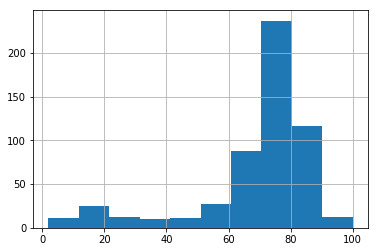

In [56]:
Y.loc[:, 'popularity'].hist()

In [57]:
for i in range(0,3):
    #Value Counts
    print(Y.columns[i])
    print(Y.iloc[:,i].value_counts())

global
True     290
False    259
Name: global, dtype: int64
global_100
False    365
True     184
Name: global_100, dtype: int64
global_top
False    540
True       9
Name: global_top, dtype: int64


In [58]:
# Define cost model:
a = 10
b = 20
c = 100

Y['successFactor'] = Y.loc[:,'global']*a+Y.global_100*b+Y.global_top*c+Y.popularity

In [59]:
Y.head()

,global,global_100,global_top,popularity,successFactor
141,False,False,False,62,62
150,True,False,False,80,90
76,True,True,False,90,120
202,False,False,False,70,70
324,False,False,False,61,61


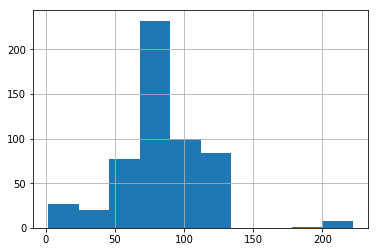

In [60]:
Y.loc[:, 'successFactor'].hist()

In [61]:
# Create bins for successFactor
Y_sF = pd.qcut(Y.loc[:, 'successFactor'], 4, labels=False)
Y_sF.head()

141    0
150    2
76     3
202    1
324    0
Name: successFactor, dtype: int64

In [62]:
Y_sF.value_counts()

1    151
0    138
3    135
2    125
Name: successFactor, dtype: int64

In [64]:
#Perform logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y_sF, test_size=0.15, random_state=100)
print('Logistic Regression on success Factor: ')
logRegModel = LogisticRegression()
logRegModel.fit(x_train, y_train)
# Accuracy
print('Train Accuracy:')
print(logRegModel.score(x_train, y_train))
print('Test Accuracy:')
print(logRegModel.score(x_test, y_test))

Logistic Regression on success Factor: 
Train Accuracy:
0.26394849785407726
Test Accuracy:
0.3373493975903614


In [65]:
printConfusionMatrix(y_test, logRegModel.predict(x_test))

   0   1  2  3
0  0  19  0  0
1  0  28  0  0
2  0  18  0  0
3  0  18  0  0


In [74]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
acc_rf1 = random_forest.score(x_train, y_train)
acc_rf2 = random_forest.score(x_test, y_test)
print("Random Forest: ")
print("Training: ", acc_rf1)
print("Test: ", acc_rf2)

Random Forest: 
Training:  0.9978540772532188
Test:  0.2891566265060241


In [75]:
printConfusionMatrix(y_test, random_forest.predict(x_test))

    0  1  2   3
0  10  4  3   2
1   9  6  3  10
2   6  7  0   5
3   4  2  4   8
